In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd


# Read training data
train_dataset = pd.read_csv("data/train.csv")
train_dataset.rename(columns={"user": "user_id"}, inplace=True)
train_dataset.rename(columns={"event": "event_id"}, inplace=True)

events = pd.read_csv("data/events.csv")
users = pd.read_csv("data/users.csv")
print('Training set: ', train_dataset.shape)
print('User data: ', users.shape)
print('Events: ', events.shape)

train_dataset.head()

Training set:  (15398, 6)
User data:  (38209, 7)
Events:  (3137972, 110)


,user_id,event_id,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [19]:
idx = random.permutation(events.shape[0])[:5]
events.loc[idx]

,event_id,user_id,start_time,city,state,zip,country,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
55456,3568754741,2720360174,2012-11-25T10:30:00.003Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,1,0,1,0,0,0,81
715115,91072989,1812180856,2012-11-22T03:00:00.003Z,Jacksonville,FL,32246,United States,30.286,-81.533,2,...,0,0,0,0,0,0,0,0,0,18
2569100,4062611330,819733664,2012-04-03T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,45
2435094,1856623880,2730359507,2012-07-28T19:00:00.000Z,Washington,DC,NaN,United States,38.904,-77.031,2,...,0,0,0,0,0,0,0,0,0,56
417847,1082503429,2101207252,2012-08-27T22:00:00.003Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,25


In [40]:
train = train_dataset.merge(
    users, left_on='user_id', right_on='user_id', how='inner')
print("train.csv: ", train_dataset.shape[0], "train+users: ", train.shape[0])
idx = random.permutation(train.shape[0])[:5]
print(train.shape)
train.loc[idx, :]

train.csv:  15398 train+users:  15398
(15398, 12)


,user_id,event_id,invited,timestamp,interested,not_interested,locale,birthyear,gender,joinedAt,location,timezone
3723,1044598291,2007279414,0,2012-11-01 07:48:07.728000+00:00,0,0,en_US,1992,male,2012-11-01T07:47:18.636Z,Phnom Penh,420.0
10856,3131909049,2115491671,0,2012-10-30 20:13:03.824000+00:00,0,0,es_LA,1998,female,2012-10-30T20:12:20.881Z,Santo Domingo Dominican Republic,-240.0
6622,1952293169,2621503414,0,2012-11-04 02:41:34.387000+00:00,0,0,id_ID,1990,male,2012-10-28T12:24:20.223Z,Yogyakarta,420.0
6941,2062768867,1478537984,0,2012-11-03 21:12:09.198000+00:00,0,0,es_LA,1994,female,2012-11-03T21:10:44.857Z,Cruce De Guayacanes Valverde Dominican Republic,480.0
12405,3514195773,589300788,0,2012-10-30 15:48:55.636000+00:00,0,0,en_US,1974,male,2012-10-30T15:46:53.693Z,Oakland California,-480.0


In [41]:
train = train.merge(
    events, left_on="event_id", right_on="event_id", how="inner")
print("train.csv: ", train_dataset.shape[0], "train+users+events: ", train.shape[0])
print(train.shape)

train.csv:  15398 train+users+events:  15398
(15398, 121)


In [46]:
df = train
df[df.columns[~pd.Series(df.columns).str.endswith('_y')]]
train = df

In [47]:
idx = random.permutation(train_dataset.shape[0])
idx_sample = idx[:5]

print("Dimensions: ", train_dataset.shape)
print("Features:", train_dataset.columns.values)
print("5 random entries:")
train.loc[idx_sample,:]

Dimensions:  (15398, 6)
Features: ['user_id' 'event_id' 'invited' 'timestamp' 'interested' 'not_interested']
5 random entries:


,user_id_x,event_id,invited,timestamp,interested,not_interested,locale,birthyear,gender,joinedAt,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
11184,2338481531,2525447278,1,2012-07-25 11:39:12.139000+00:00,0,0,en_US,1972,male,2012-07-25T11:38:20.207Z,...,0,0,0,0,2,0,0,0,0,139
8072,1017178142,3764710330,0,2012-11-28 22:02:26.534000+00:00,1,0,en_US,1992,male,2012-11-04T20:30:22.997Z,...,0,0,0,0,0,0,0,0,0,49
6603,589199943,1367504809,0,2012-10-01 03:06:37.066000+00:00,0,0,id_ID,1992,male,2012-10-01T03:04:34.075Z,...,0,0,0,0,0,0,0,0,0,3
12374,2903662804,2825871581,0,2012-11-26 19:03:18.672000+00:00,0,0,en_US,1981,female,2012-06-28T04:44:44.577Z,...,0,0,0,1,0,0,0,0,0,20
972,16210231,807439632,0,2012-10-28 03:38:41.513000+00:00,0,0,id_ID,1991,male,2012-10-28T03:38:22.649Z,...,0,0,0,0,0,0,0,0,0,22


In [48]:
idx = random.permutation(train_dataset.shape[0])
idx_sample = idx[:5]

print("Dimensions: ", train.shape)
print("Features:", train.columns.values)
print("5 random entries:")
train.loc[idx_sample,:]

Dimensions:  (15398, 121)
Features: ['user_id_x' 'event_id' 'invited' 'timestamp' 'interested' 'not_interested'
 'locale' 'birthyear' 'gender' 'joinedAt' 'location' 'timezone' 'user_id_y'
 'start_time' 'city' 'state' 'zip' 'country' 'lat' 'lng' 'c_1' 'c_2' 'c_3'
 'c_4' 'c_5' 'c_6' 'c_7' 'c_8' 'c_9' 'c_10' 'c_11' 'c_12' 'c_13' 'c_14'
 'c_15' 'c_16' 'c_17' 'c_18' 'c_19' 'c_20' 'c_21' 'c_22' 'c_23' 'c_24'
 'c_25' 'c_26' 'c_27' 'c_28' 'c_29' 'c_30' 'c_31' 'c_32' 'c_33' 'c_34'
 'c_35' 'c_36' 'c_37' 'c_38' 'c_39' 'c_40' 'c_41' 'c_42' 'c_43' 'c_44'
 'c_45' 'c_46' 'c_47' 'c_48' 'c_49' 'c_50' 'c_51' 'c_52' 'c_53' 'c_54'
 'c_55' 'c_56' 'c_57' 'c_58' 'c_59' 'c_60' 'c_61' 'c_62' 'c_63' 'c_64'
 'c_65' 'c_66' 'c_67' 'c_68' 'c_69' 'c_70' 'c_71' 'c_72' 'c_73' 'c_74'
 'c_75' 'c_76' 'c_77' 'c_78' 'c_79' 'c_80' 'c_81' 'c_82' 'c_83' 'c_84'
 'c_85' 'c_86' 'c_87' 'c_88' 'c_89' 'c_90' 'c_91' 'c_92' 'c_93' 'c_94'
 'c_95' 'c_96' 'c_97' 'c_98' 'c_99' 'c_100' 'c_other']
5 random entries:


,user_id_x,event_id,invited,timestamp,interested,not_interested,locale,birthyear,gender,joinedAt,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
11051,2261578513,3814517723,0,2012-11-01 04:07:55.920000+00:00,0,0,en_US,1987,female,2012-11-01T01:20:30.673Z,...,0,0,0,0,0,0,0,0,0,131
12811,3071252660,1080261006,0,2012-10-24 16:16:44.503000+00:00,0,0,id_ID,1995,male,2012-10-03T12:11:24.893Z,...,0,0,0,0,0,0,0,1,0,4
8717,3368619983,1425625542,0,2012-11-05 08:20:52.391000+00:00,0,0,en_GB,1990,male,2012-11-05T08:19:27.988Z,...,0,0,0,0,0,0,0,0,0,110
10678,2129690960,2318827942,0,2012-11-10 23:40:57.277000+00:00,0,0,id_ID,1994,male,2012-10-29T05:43:35.906Z,...,0,0,0,0,0,0,0,0,0,60
463,4236494,110357109,0,2012-10-30 01:48:25.617000+00:00,0,0,en_US,1998,female,2012-10-30T01:47:18.708Z,...,0,0,0,0,0,0,0,0,0,27


In [49]:
train.describe()

,user_id_x,event_id,invited,interested,not_interested,timezone,user_id_y,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
count,1.539800e+04,1.539800e+04,15398.000000,15398.000000,15398.000000,15337.000000,1.539800e+04,9848.000000,9848.000000,15398.000000,...,15398.000000,15398.000000,15398.000000,15398.000000,15398.000000,15398.000000,15398.000000,15398.000000,15398.000000,15398.000000
mean,2.199685e+09,2.060937e+09,0.042473,0.268282,0.033381,122.409859,2.193469e+09,16.971027,23.467942,2.373230,...,0.072737,0.072672,0.081439,0.110729,0.067931,0.431420,0.053254,0.088778,0.063839,61.414989
std,1.268887e+09,1.190660e+09,0.201672,0.443079,0.179635,374.340503,1.255168e+09,20.849904,93.717526,30.734271,...,0.310720,0.348843,0.358048,0.365439,0.474247,25.139418,0.291502,0.497029,0.314637,155.714137
min,3.044012e+06,1.040700e+05,0.000000,0.000000,0.000000,-720.000000,1.329876e+06,-50.333000,-157.863000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.071319e+09,1.057229e+09,0.000000,0.000000,0.000000,-300.000000,1.051800e+09,3.172500,-79.392000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,2.259555e+09,1.996503e+09,0.000000,0.000000,0.000000,420.000000,2.257228e+09,11.569000,98.616000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000
75%,3.292836e+09,3.060446e+09,0.000000,1.000000,0.000000,420.000000,3.286716e+09,37.789000,104.923000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000
max,4.293103e+09,4.294677e+09,1.000000,1.000000,1.000000,810.000000,4.294033e+09,60.226000,174.777000,2186.000000,...,6.000000,9.000000,10.000000,9.000000,23.000000,1801.000000,9.000000,16.000000,7.000000,9664.000000


In [50]:
def getPctMissing(series):
    num = series.isnull().sum()
    den = series.count()
    return 100*(num/float(den))

def print_missing_stats(data):
    for column in data.columns.values:
        print(column, " % missing", getPctMissing(data[column]))

# print_missing_stats(train_dataset)

In [51]:
# How many entries are in a 'undecided' state?

train[
((train.interested == 1) & (train.not_interested == 1))].count() / train.count()

user_id_x         0.0
event_id          0.0
invited           0.0
timestamp         0.0
interested        0.0
not_interested    0.0
locale            0.0
birthyear         0.0
gender            0.0
joinedAt          0.0
location          0.0
timezone          0.0
user_id_y         0.0
start_time        0.0
city              0.0
state             0.0
zip               0.0
country           0.0
lat               0.0
lng               0.0
c_1               0.0
c_2               0.0
c_3               0.0
c_4               0.0
c_5               0.0
c_6               0.0
c_7               0.0
c_8               0.0
c_9               0.0
c_10              0.0
                 ... 
c_72              0.0
c_73              0.0
c_74              0.0
c_75              0.0
c_76              0.0
c_77              0.0
c_78              0.0
c_79              0.0
c_80              0.0
c_81              0.0
c_82              0.0
c_83              0.0
c_84              0.0
c_85              0.0
c_86      

In [52]:
# Are there plain invalid entries? (both interested and not interested?

train[((train.interested == 1) & (train.not_interested == 1))].count() / train.count()

user_id_x         0.0
event_id          0.0
invited           0.0
timestamp         0.0
interested        0.0
not_interested    0.0
locale            0.0
birthyear         0.0
gender            0.0
joinedAt          0.0
location          0.0
timezone          0.0
user_id_y         0.0
start_time        0.0
city              0.0
state             0.0
zip               0.0
country           0.0
lat               0.0
lng               0.0
c_1               0.0
c_2               0.0
c_3               0.0
c_4               0.0
c_5               0.0
c_6               0.0
c_7               0.0
c_8               0.0
c_9               0.0
c_10              0.0
                 ... 
c_72              0.0
c_73              0.0
c_74              0.0
c_75              0.0
c_76              0.0
c_77              0.0
c_78              0.0
c_79              0.0
c_80              0.0
c_81              0.0
c_82              0.0
c_83              0.0
c_84              0.0
c_85              0.0
c_86      

In [70]:
target.loc[model_features.index].ravel()

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [132]:
# Let's shrink down the feature set in order to train the first model
model_features = train[["invited", "gender",\
                                "birthyear", "timezone", "locale", "lat", "lng"]]
target = train[["interested"]]

# there's still something wrong with the dataset.
# looks like the birthyear column includes some undefined
# values and Pandas treats them as string. That causes
# the random forest classifier to fail

# let's drop the missing birthyear values
model_features = model_features[model_features["birthyear"] != 'None']
model_features = model_features[model_features["birthyear"].notnull()]
model_features = model_features[model_features["birthyear"] != NaN]
model_features = model_features[model_features["lat"].isnull() != True]
model_features = model_features[model_features["lng"].isnull() != True]
model_features = model_features[model_features["timezone"].isnull() != True]


# turn the 'gender' column into categorical data,
# expressed in numeric form
model_features.loc[:, "gender"] = model_features.loc[:, "gender"].astype("category")
model_features.loc[:, "locale"] = model_features.loc[:, "locale"].astype("category")
# model_features.loc[:, "lat"] = model_features.loc[:, "lat"].astype("category")
# model_features.loc[:, "lng"] = model_features.loc[:, "lng"].astype("category")

cat_columns = model_features.select_dtypes(['category', ]).columns
model_features.loc[:, cat_columns] = model_features[cat_columns].apply(lambda x: x.cat.codes)

model_features.loc[:,"birthyear"] = model_features["birthyear"].astype("int32")
model_features.loc[:,"invited"] = model_features["invited"].astype("int32")
model_features.loc[:,"gender"] = model_features["gender"].astype("int32")

model_features = model_features[model_features["birthyear"] > 1960]

model_target = target.loc[model_features.index].values.ravel()

target = train.loc[model_features.index, "interested"]
print(model_features.shape)

model_features.head()

(9519, 7)


,invited,gender,birthyear,timezone,locale,lat,lng
2,0,1,1990,480.0,10,-7.767,110.363
3,0,1,1993,420.0,10,-7.767,110.363
4,0,1,1987,690.0,10,-7.767,110.363
5,0,1,1997,420.0,10,-7.767,110.363
6,0,1,1990,480.0,10,3.567,98.650


In [133]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if numpy.issubdtype(df[feature_name].dtype, numpy.number):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
model_features = normalize(model_features)

In [134]:
# random forest doesn't like missing values,
# I don't think imputing missing coordinate values is a good idea,
# but let's give it a shot

#model_features = model_features[model_features["lat"].notnull() &
                                #model_features["lng"].notnull() &
                                #model_features["timezone"].notnull()]


#print(model_features.shape)
#model_features.head(10)

model_features.corr()

,invited,gender,birthyear,timezone,locale,lat,lng
invited,1.000000,-0.027395,-0.168446,-0.169051,-0.138909,0.168648,-0.181420
gender,-0.027395,1.000000,0.024536,0.076163,0.094166,-0.054607,0.072499
birthyear,-0.168446,0.024536,1.000000,0.473116,0.386374,-0.428106,0.459648
timezone,-0.169051,0.076163,0.473116,1.000000,0.485958,-0.629363,0.795821
locale,-0.138909,0.094166,0.386374,0.485958,1.000000,-0.455235,0.479412
lat,0.168648,-0.054607,-0.428106,-0.629363,-0.455235,1.000000,-0.794261
lng,-0.181420,0.072499,0.459648,0.795821,0.479412,-0.794261,1.000000


In [130]:
for col in model_features:
    print(col, model_features[col].dtypes)

invited float64
gender float64
birthyear float64
timezone float64
locale float64
lat float64
lng float64
datetime_hour_of_day float64
datetime_day_of_week float64
datetime_day_of_month float64
datetime_day_of_year float64
datetime_month_of_year float64
datetime_minute_of_hour float64
datetime_second_of_minute float64
datetime_year float64
quarter_of_year float64
week_of_year float64


In [198]:
set(model_features["birthyear"].values)

{1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999}

In [83]:
model_target[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [61]:
train.loc[model_features[:10].index]

,user_id_x,event_id,invited,timestamp,interested,not_interested,locale,birthyear,gender,joinedAt,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
2,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0,id_ID,1990,male,2012-10-02T15:50:21.023Z,...,0,0,0,0,0,0,0,0,0,24
3,1302145719,1502284248,0,2012-09-30 13:31:33.569000+00:00,0,0,id_ID,1993,male,2012-09-30T13:24:05.854Z,...,0,0,0,0,0,0,0,0,0,24
4,3194014105,1502284248,0,2012-10-01 17:20:14.536000+00:00,0,0,id_ID,1987,male,2012-10-01T17:10:53.195Z,...,0,0,0,0,0,0,0,0,0,24
5,3669515588,1502284248,0,2012-10-03 09:27:28.804000+00:00,0,0,id_ID,1997,male,2012-10-03T09:23:57.519Z,...,0,0,0,0,0,0,0,0,0,24
6,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0,id_ID,1990,male,2012-10-02T15:50:21.023Z,...,0,0,0,1,0,0,0,0,0,37
7,23170479,2529072432,0,2012-10-05 06:42:29.831000+00:00,1,0,id_ID,1995,male,2012-09-30T06:15:26.040Z,...,0,0,0,1,0,0,0,0,0,37
8,26389537,2529072432,0,2012-10-05 12:51:22.928000+00:00,0,0,id_ID,1994,male,2012-10-05T12:48:16.355Z,...,0,0,0,1,0,0,0,0,0,37
9,38974975,2529072432,0,2012-10-02 15:33:58.471000+00:00,1,0,id_ID,1998,female,2012-10-02T15:32:02.882Z,...,0,0,0,1,0,0,0,0,0,37
10,70152834,2529072432,0,2012-10-04 05:36:37.250000+00:00,1,0,id_ID,1995,male,2012-10-04T05:36:10.137Z,...,0,0,0,1,0,0,0,0,0,37
11,91139927,2529072432,0,2012-10-23 03:49:23.651000+00:00,0,0,id_ID,1993,male,2012-10-23T03:48:45.975Z,...,0,0,0,1,0,0,0,0,0,37


In [62]:
from sklearn.ensemble import RandomForestClassifier

def train_model(features, target):
    rf = RandomForestClassifier()
    rf.fit(features, target)
    
    return rf

def predict(model, features):
    return model.predict(features)

In [135]:
N = model_features.shape[0]
K = 10 # number of folds

preds_kfold = np.empty(N)
# this array specifies for each sample in the dataset the fold it belongs to
folds = np.random.randint(0, K, size=N)

# a brief example of picking samples
# via a boolean array. Each array member states whether the 
# sample at the same index should be picked
sample_flags = rand(100) > 2
sample_flags[2] = True
#print(_model_features.loc[sample_flags,:])

for idx in np.arange(K):
    # For each fold, break your data into training and testing subsets
    features_train = model_features.loc[folds != idx]
    target_train = model_target[folds != idx]
    features_test = model_features.loc[folds == idx]
    
    # Print the indices in each fold, for inspection
    #print(nonzero(folds == idx)[0])

    # Build and predict for CV fold
    model = train_model(features_train, target_train)
    preds_kfold[folds == idx] = predict(model, features_test)
    
# accuracy = evaluate_acc(preds_kfold, target)

In [136]:
fold_aray = folds == 1
features_fold = model_features.loc[fold_aray]
len(fold_aray)
print(model_features.shape)
print(features_fold.shape)

(9519, 7)
(945, 7)


In [137]:
def roc_curve(true_labels, predicted_probs, n_points=100, pos_class=1):
    thr = linspace(0,1,n_points) # generate n thresholds. They'll be used to compute ROC over
    tpr = zeros(n_points)
    fpr = zeros(n_points)

    pos = true_labels == pos_class
    neg = logical_not(pos)
    n_pos = count_nonzero(pos)
    n_neg = count_nonzero(neg)
      
    for i, t in enumerate(thr):
        tpr[i] = count_nonzero(logical_and(predicted_probs >= t, pos)) / n_pos
        fpr[i] = count_nonzero(logical_and(predicted_probs >= t, neg)) / n_neg
    
    return fpr, tpr, thr

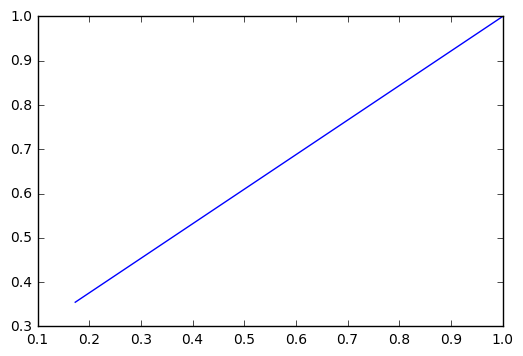

In [138]:
fpr, tpr, thr = roc_curve(model_target, preds_kfold, pos_class=1)
plot(fpr, tpr)

In [139]:
def auc(true_labels, predicted_labels, pos_class=1):
    fpr, tpr, thr = roc_curve(true_labels, predicted_labels, pos_class=pos_class)
    area = -trapz(tpr, x=fpr)
    return area

In [140]:
auc(model_target, preds_kfold, pos_class=1)

0.56036955704591762

In [141]:
# Let's double check by comparing output
# of the custom AUC method with the implementation
# built into scikit-learn

from sklearn import cross_validation

def train_evaluate_model(features, target):
    num_folds = 10 
    num_instances = features.shape[0]
    seed = 7 
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed) 
    model = RandomForestClassifier(n_estimators=100)
    X = features.values
    Y = target
    results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
    print("AUC: ", results.mean(), "Standard deviation: ", results.std()*100.0, "%")
    
train_evaluate_model(model_features, model_target)

AUC:  0.559440177157 Standard deviation:  4.99801281274 %


In [143]:
# Okay, moving on to engineering the date & time features (5.2.2)
from dateutil import parser


def get_quarter_of_year(dt):
    prev_quarter_map = ((4, -1), (1, 0), (2, 0), (3, 0))
    quarter, yd = prev_quarter_map[(dt.month - 1) // 3]
    return quarter

def transform_start_time(transformation):
    
    return train.loc[model_features.index]["start_time"].apply(transformation)
    
date = parser.parse(train["start_time"].loc[0])
print(train.loc[model_features.index]["start_time"].head())
model_features["datetime_hour_of_day"] =\
    transform_start_time(lambda time: parser.parse(time).hour)
model_features["datetime_day_of_week"] =\
    transform_start_time(lambda time: parser.parse(time).weekday())
model_features["datetime_day_of_month"] =\
    transform_start_time(lambda time: parser.parse(time).day)
model_features["datetime_day_of_year"] =\
    transform_start_time(lambda time: parser.parse(time).timetuple().tm_yday)
model_features["datetime_month_of_year"] =\
    transform_start_time(lambda time: parser.parse(time).month)
model_features["datetime_minute_of_hour"] =\
    transform_start_time(lambda time: parser.parse(time).minute)
model_features["datetime_second_of_minute"] =\
    transform_start_time(lambda time: parser.parse(time).second)
model_features["datetime_year"] =\
    transform_start_time(lambda time: parser.parse(time).year)
model_features["quarter_of_year"] =\
    transform_start_time(lambda time: get_quarter_of_year(parser.parse(time)))
model_features["week_of_year"] =\
    transform_start_time(lambda time: parser.parse(time).isocalendar()[1])
model_features["week_of_year"].head()

2    2012-10-03T11:00:00.003Z
3    2012-10-03T11:00:00.003Z
4    2012-10-03T11:00:00.003Z
5    2012-10-03T11:00:00.003Z
6    2012-10-26T13:30:00.003Z
Name: start_time, dtype: object


2    40
3    40
4    40
5    40
6    43
Name: week_of_year, dtype: int64

In [145]:
train_evaluate_model(model_features, model_target)

AUC:  0.579092670991 Standard deviation:  2.78741326992 %


In [163]:
# Time to get working with text features

text_features = train[train.columns[train.columns.str.startswith("c_")]]
text_features = text_features.loc[model_features.index]

model_features = model_features.join(text_features, how = 'right')

In [165]:
train_evaluate_model(model_features, model_target)

AUC:  0.574928331876 Standard deviation:  3.288253819 %
